In [200]:
import sys
import os

# Add project root to Python path
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(PROJECT_ROOT)

from src.evaluate import load_model

model_path = os.path.join(PROJECT_ROOT, "checkpoints/ecssd_exp/best_model.keras")
model = load_model(model_path)

print("Model loaded successfully:", model_path)

Model loaded successfully: c:\Users\Admin\Desktop\ML_SOD\checkpoints/ecssd_exp/best_model.keras


Using test image: c:\Users\Admin\Desktop\ML_SOD\data/ecssd/test/images\0808.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


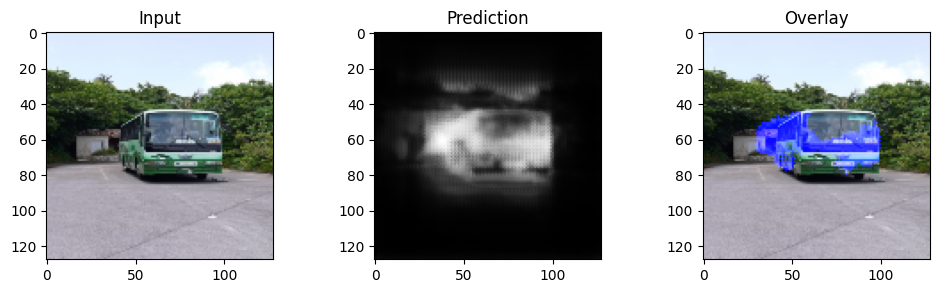

In [201]:
import random, cv2
from src.evaluate import predict_and_visualize

test_dir = os.path.join(PROJECT_ROOT, "data/ecssd/test/images")
test_files = os.listdir(test_dir)
test_image_path = os.path.join(test_dir, random.choice(test_files))

print("Using test image:", test_image_path)

pred, inference_time = predict_and_visualize(model, test_image_path)


In [202]:
import cv2
from src.evaluate import evaluate_mask

mask_path = test_image_path.replace("images", "masks").replace(".jpg", ".png")
true_mask = cv2.imread(mask_path, 0)

if true_mask is None:
    print("Mask not found:", mask_path)
else:
    true_mask = cv2.resize(true_mask, (128, 128))
    precision, recall, f1, iou = evaluate_mask(pred, true_mask)
    print("Evaluation on this image:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"IoU:       {iou:.4f}")
    print(f"Inference Time: {inference_time:.4f} seconds")


Evaluation on this image:
Precision: 0.7929
Recall:    0.5374
F1 Score:  0.6406
IoU:       0.4712
Inference Time: 0.3409 seconds


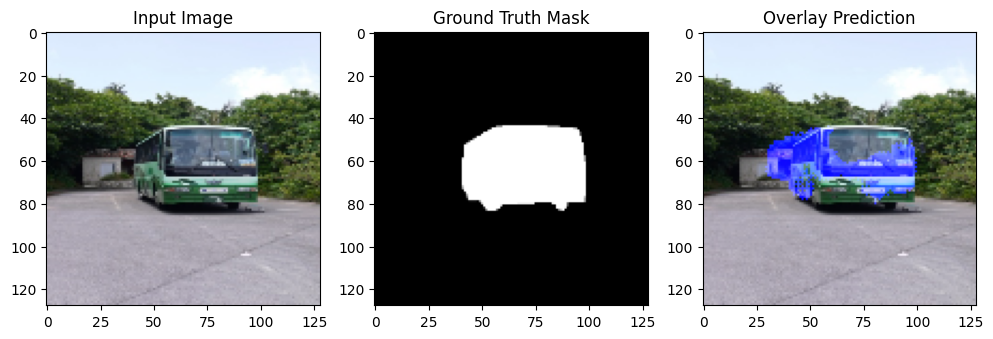

In [203]:
import matplotlib.pyplot as plt
import numpy as np

img_true = cv2.imread(test_image_path)
img_true = cv2.resize(img_true, (128, 128))

plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.imshow(img_true[..., ::-1])
plt.title("Input Image")

plt.subplot(1, 3, 2)
plt.imshow(true_mask, cmap="gray")
plt.title("Ground Truth Mask")

pred_bin = (pred > 0.5).astype(np.uint8)
overlay = img_true.copy()
overlay[:, :, 0] = overlay[:, :, 0] * (1 - pred_bin) + 255 * pred_bin

plt.subplot(1, 3, 3)
plt.imshow(overlay[..., ::-1])
plt.title("Overlay Prediction")

plt.show()


In [204]:
import sys
import os

# Add project root to Python path
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(PROJECT_ROOT)

from src.evaluate import load_model

model_path = os.path.join(PROJECT_ROOT, "checkpoints/ecssd_exp/best_model.keras")
model = load_model(model_path)

print("Model loaded successfully:", model_path)

Model loaded successfully: c:\Users\Admin\Desktop\ML_SOD\checkpoints/ecssd_exp/best_model.keras
